In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
path_col = '/content/2007_000549.jpg'
img_color = cv2.imread(path_col)
path_gray="/content/2007_000999.jpg"
img_gray = cv2.imread(path_gray, cv2.IMREAD_GRAYSCALE)

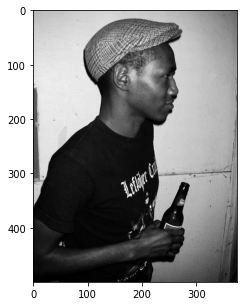

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(img_gray, cmap='gray')
plt.show()

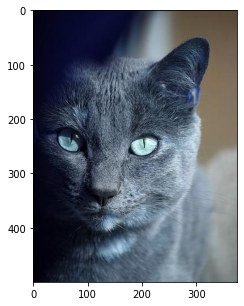

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(img_color)
plt.show()

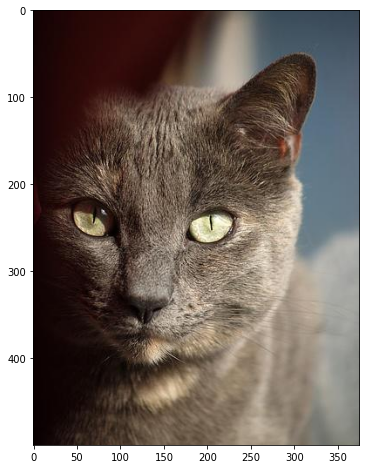

In [ ]:
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) #to rgb
plt.figure(figsize=(15, 8))
plt.imshow(img_rgb)
plt.show();

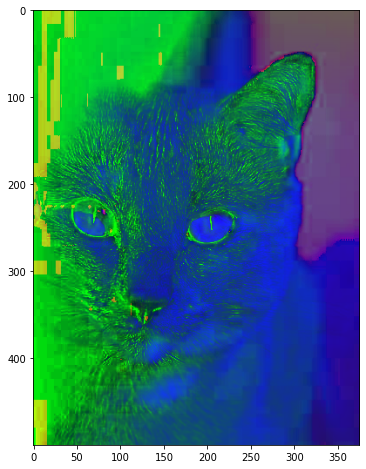

In [ ]:
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV) #to hsv
plt.figure(figsize=(15, 8))
plt.imshow(img_hsv)
plt.show();

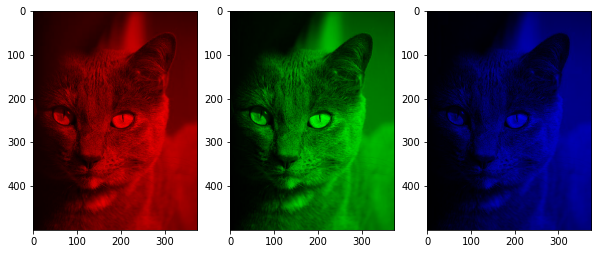

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(131);
R = np.zeros(img_rgb.shape, dtype='uint8')
R[:, :, 0] = img_rgb[:, :, 0]
plt.imshow(R)

plt.subplot(132);
G = np.zeros(img_rgb.shape, dtype='uint8')
G[:, :, 1] = img_rgb[:, :, 1]
plt.imshow(G)

plt.subplot(133);
B = np.zeros(img_rgb.shape, dtype='uint8')
B[:, :, 2] = img_rgb[:, :, 2]
plt.imshow(B)

plt.show()

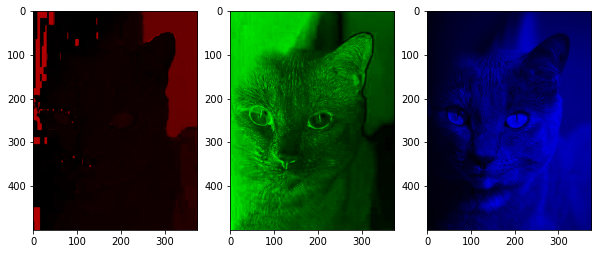

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(131);
R = np.zeros(img_hsv.shape, dtype='uint8')
R[:, :, 0] = img_hsv[:, :, 0]
plt.imshow(R)

plt.subplot(132);
G = np.zeros(img_hsv.shape, dtype='uint8')
G[:, :, 1] = img_hsv[:, :, 1]
plt.imshow(G)

plt.subplot(133);
B = np.zeros(img_hsv.shape, dtype='uint8')
B[:, :, 2] = img_hsv[:, :, 2]
plt.imshow(B)

plt.show()

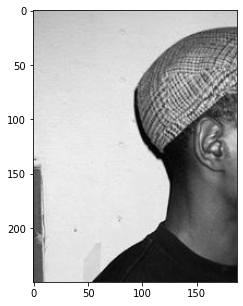

In [ ]:
inter_img= img_gray[0: int(img_gray.shape[0]/2), 0: int(img_gray.shape[1]/2)] #first 
plt.figure(figsize=(5, 5))
plt.imshow(inter_img, cmap='gray')
plt.show()

In [ ]:
cnts = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #second
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = img_gray[0: int(img_gray.shape[0]/2), 0: int(img_gray.shape[1]/2)]

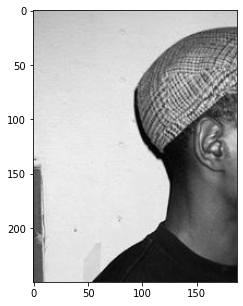

In [ ]:
plt.figure(figsize=(5, 5)) # show
plt.imshow(ROI, cmap='gray')
plt.show()

In [ ]:
cv2.imwrite("ROI.jpg", ROI) #save

True

In [ ]:
rgb = img_color[...,::-1].copy()

In [ ]:
def rgb2hsv(rgb):
    """ convert RGB to HSV color space

    :param rgb: np.ndarray
    :return: np.ndarray
    """

    rgb = rgb.astype('float')
    maxv = np.amax(rgb, axis=2)
    maxc = np.argmax(rgb, axis=2)
    minv = np.amin(rgb, axis=2)
    minc = np.argmin(rgb, axis=2)

    hsv = np.zeros(rgb.shape, dtype='float')
    hsv[maxc == minc, 0] = np.zeros(hsv[maxc == minc, 0].shape)
    hsv[maxc == 0, 0] = (((rgb[..., 1] - rgb[..., 2]) * 60.0 / (maxv - minv + np.spacing(1))) % 360.0)[maxc == 0]
    hsv[maxc == 1, 0] = (((rgb[..., 2] - rgb[..., 0]) * 60.0 / (maxv - minv + np.spacing(1))) + 120.0)[maxc == 1]
    hsv[maxc == 2, 0] = (((rgb[..., 0] - rgb[..., 1]) * 60.0 / (maxv - minv + np.spacing(1))) + 240.0)[maxc == 2]
    hsv[maxv == 0, 1] = np.zeros(hsv[maxv == 0, 1].shape)
    hsv[maxv != 0, 1] = (1 - minv / (maxv + np.spacing(1)))[maxv != 0]
    hsv[..., 2] = maxv

    return hsv

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


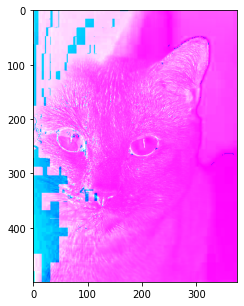

In [ ]:
a=rgb2hsv(rgb)
plt.figure(figsize=(5, 5)) # show
plt.imshow(a)
plt.show()

In [ ]:
def rgb_to_hsv(rgb):
    """
    >>> from colorsys import rgb_to_hsv as rgb_to_hsv_single
    >>> 'h={:.2f} s={:.2f} v={:.2f}'.format(*rgb_to_hsv_single(50, 120, 239))
    'h=0.60 s=0.79 v=239.00'
    >>> 'h={:.2f} s={:.2f} v={:.2f}'.format(*rgb_to_hsv_single(163, 200, 130))
    'h=0.25 s=0.35 v=200.00'
    >>> np.set_printoptions(2)
    >>> rgb_to_hsv(np.array([[[50, 120, 239], [163, 200, 130]]]))
    array([[[   0.6 ,    0.79,  239.  ],
            [   0.25,    0.35,  200.  ]]])
    >>> 'h={:.2f} s={:.2f} v={:.2f}'.format(*rgb_to_hsv_single(100, 100, 100))
    'h=0.00 s=0.00 v=100.00'
    >>> rgb_to_hsv(np.array([[50, 120, 239], [100, 100, 100]]))
    array([[   0.6 ,    0.79,  239.  ],
           [   0.  ,    0.  ,  100.  ]])
    """
    input_shape = rgb.shape
    rgb = rgb.reshape(-1, 3)
    r, g, b = rgb[:, 0], rgb[:, 1], rgb[:, 2]

    maxc = np.maximum(np.maximum(r, g), b)
    minc = np.minimum(np.minimum(r, g), b)
    v = maxc

    deltac = maxc - minc
    s = deltac / maxc
    deltac[deltac == 0] = 1  # to not divide by zero (those results in any way would be overridden in next lines)
    rc = (maxc - r) / deltac
    gc = (maxc - g) / deltac
    bc = (maxc - b) / deltac

    h = 4.0 + gc - rc
    h[g == maxc] = 2.0 + rc[g == maxc] - bc[g == maxc]
    h[r == maxc] = bc[r == maxc] - gc[r == maxc]
    h[minc == maxc] = 0.0

    h = (h / 6.0) % 1.0
    res = np.dstack([h, s, v])
    return res.reshape(input_shape)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


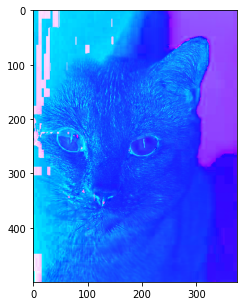

In [ ]:
a1=rgb_to_hsv(rgb)
plt.figure(figsize=(5, 5)) # show
plt.imshow(a1)
plt.show()